<a href="https://colab.research.google.com/github/Divine193/access6.0projects/blob/master/WEEK4/sess7/Part1_%26_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# LOAD THE CLEANED DATASET
cleaned_data = pd.read_csv('/content/drive/MyDrive/Cleaned_Sales_Data.csv')

In [ ]:
cleaned_data.head()

## Feature Engineering was performed during data cleaning to create Total Sales Column and Date column
## Column to be encoded is the Item type column using One Hot Encoder approach.
## Other categorical Variables has too many unique columns that One Hot Encoder will create man columns so it is better to use more advanced encoding methods or drop the columns.

## Scaing Decisions:
## Numerical Features that need Scaling:
    - Retail Transfers
    - Warehouse Sales
    - Total Sales(Engineered Columns)

# Part 2

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# load the dataset
housing_data = pd.read_csv('/content/drive/MyDrive/housing.csv')

In [ ]:
# The first ten items
housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
# The last ten Items
housing_data.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20630,-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
# Summary of the dataset
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# Shape of the data
housing_data.shape

(20640, 10)

# Data Cleaning

## Handle Missing Values

In [ ]:
housing_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# Drop the missing values
housing_data.dropna(subset=['total_bedrooms'], inplace=True)
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Check for duplicates

In [ ]:
housing_data.duplicated().sum()

0

# EDA

## Univariate Analysis

In [ ]:
# Summary Statistics
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.3500,-121.8000,-118.4900,-118.010,-114.3100
latitude,20433.0,35.633221,2.136348,32.5400,33.9300,34.2600,37.720,41.9500
housing_median_age,20433.0,28.633094,12.591805,1.0000,18.0000,29.0000,37.000,52.0000
total_rooms,20433.0,2636.504233,2185.269567,2.0000,1450.0000,2127.0000,3143.000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.000,6445.0000
population,20433.0,1424.946949,1133.208490,3.0000,787.0000,1166.0000,1722.000,35682.0000
households,20433.0,499.433465,382.299226,1.0000,280.0000,409.0000,604.000,6082.0000
median_income,20433.0,3.871162,1.899291,0.4999,2.5637,3.5365,4.744,15.0001
median_house_value,20433.0,206864.413155,115435.667099,14999.0000,119500.0000,179700.0000,264700.000,500001.0000
rooms_per_household,20433.0,5.431366,2.482961,0.8500,4.4400,5.2300,6.050,141.9100


Text(0.5, 0.98, 'Location Characteristics')

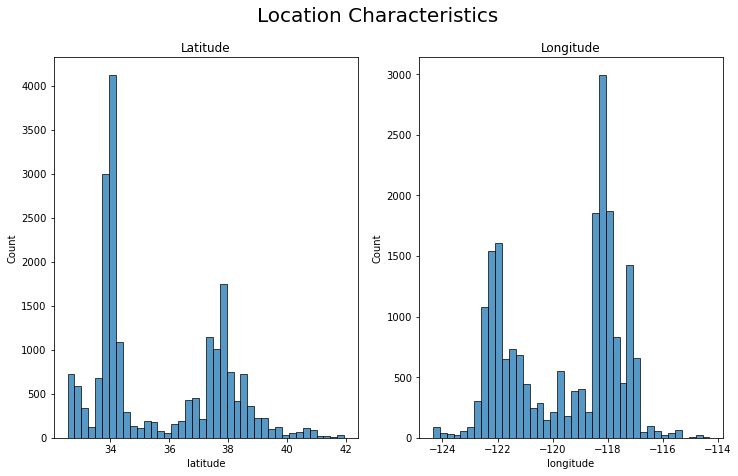

In [ ]:
# Distribution of Latitude and Longitude
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
sns.histplot(housing_data, x='latitude', bins=40, ax=axes[0])
sns.histplot(housing_data, x='longitude', bins=40, ax=axes[1])
axes[0].set_title('Latitude')
axes[1].set_title('Longitude')
fig.suptitle('Location Characteristics', fontsize=20)

Text(0, 0.5, 'Frequency')

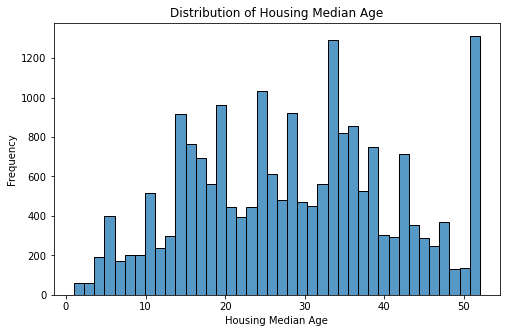

In [ ]:
# Distribution of housing median age
plt.figure(figsize=(8,5))
sns.histplot(housing_data, x='housing_median_age', bins=40)
plt.title('Distribution of Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')

Text(0.5, 0.98, 'Distribution of Total Rooms And Bedrooms')

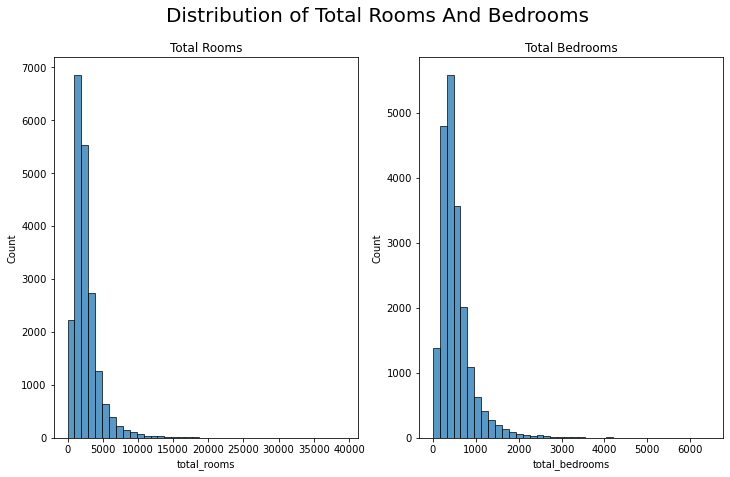

In [ ]:
# Distribution of total rooms and bedrooms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
sns.histplot(housing_data, x='total_rooms', bins=40, ax=axes[0])
sns.histplot(housing_data, x='total_bedrooms', bins=40, ax=axes[1])
axes[0].set_title('Total Rooms')
axes[1].set_title('Total Bedrooms')
fig.suptitle('Distribution of Total Rooms And Bedrooms', fontsize=20)

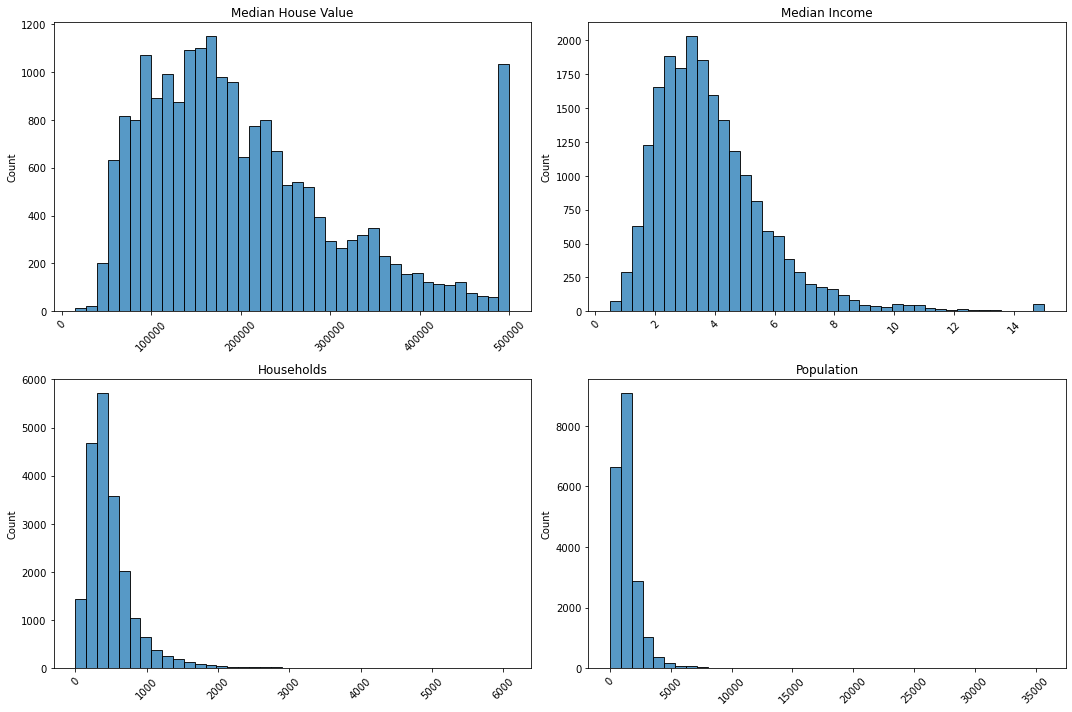

In [ ]:
house_cols = [
    'median_house_value',
    'median_income',
    'households',
    'population'
]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
axes = axes.flatten()

for i, col in enumerate(house_cols):
    sns.histplot(
        x=col,
        data=housing_data,
        bins=40,
        ax=axes[i]
    )
    axes[i].set_title(col.replace('_', ' ').title())
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()

Text(0, 0.5, 'Count')

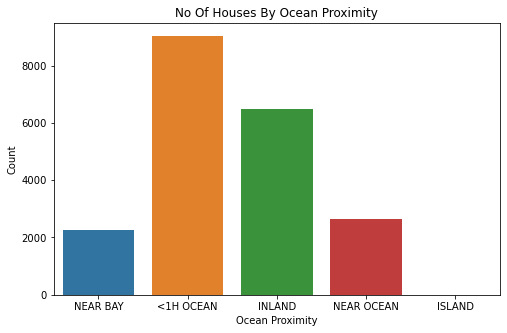

In [ ]:
# Distribution of Ocean Proximity
plt.figure(figsize=(8,5))
sns.countplot(x='ocean_proximity', data=housing_data)
plt.title('No Of Houses By Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')

## Bivariate Analysis

Text(0, 0.5, 'Prices')

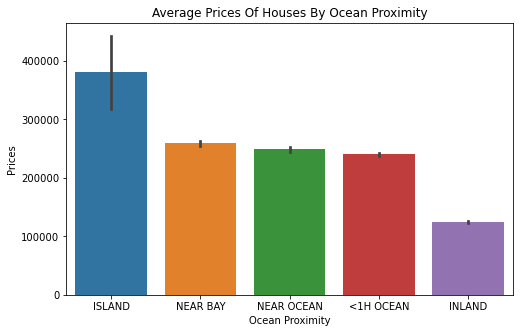

In [ ]:
# Median House Value by Ocean Proximity
house_value = housing_data.groupby('ocean_proximity')['median_house_value'].mean().sort_values(ascending=False).index
plt.figure(figsize=(8,5))
sns.barplot(x='ocean_proximity', y='median_house_value', data=housing_data, order=house_value)
plt.title('Average Prices Of Houses By Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Prices')

## Multivariate Analysis

Text(0.5, 1.0, 'Correlation Analysis of the Numerical Columns')

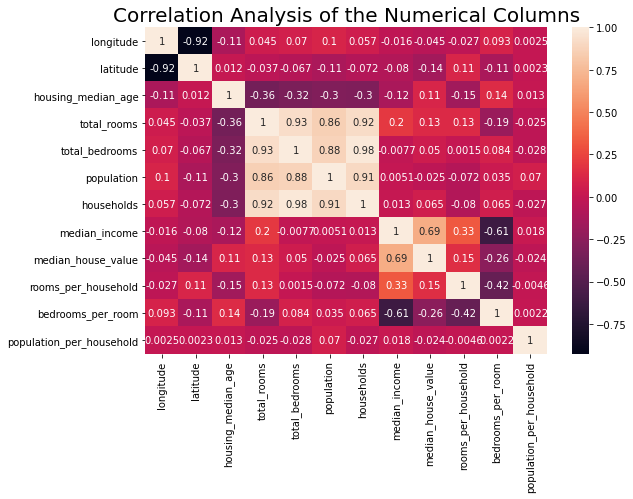

In [ ]:
# Correlation Analysis of Numerical Columns
numeric_corr = housing_data.corr()
plt.figure(figsize=(9,6))
sns.heatmap(numeric_corr, annot=True)
plt.title('Correlation Analysis of the Numerical Columns', fontsize=20)

### From the Univariate Analysis, it was discovered that all but two(housing_median_age & longitude) of the numerical columns were rightly skewed with their averages being higher than their median and mode.
### From the Bivariate Analysis, the graph shows the relationshp between how close a house is to the ocean and its price, it shows that houses far from the coast are usually cheaper than houses near the ocean and on the islands. The black lines are called error bars which shows how confident we are in the calculated average. Short lines means a lot of data is available for that category while long lines say otherwise.
### The heatmap shows which numerical columns are correlated with each other, total bedrooms, total rooms , populations and households are strongly correlated with each other which is obviously true(more people will require more bedrooms and ultimately more rooms)

# Data Preparation for Modelling

## Feature Engineering

In [ ]:
# Create three new columns for better model prediction
housing_data['rooms_per_household'] = (housing_data['total_rooms'] / housing_data['households'])
housing_data['bedrooms_per_room'] = (housing_data['total_bedrooms']  / housing_data['total_rooms'])
housing_data['population_per_household'] = housing_data['population'] / housing_data['households']

In [ ]:
# Summary Statistics
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
latitude,20433.0,35.633221,2.136348,32.540000,33.930000,34.260000,37.720000,41.950000
housing_median_age,20433.0,28.633094,12.591805,1.000000,18.000000,29.000000,37.000000,52.000000
total_rooms,20433.0,2636.504233,2185.269567,2.000000,1450.000000,2127.000000,3143.000000,39320.000000
total_bedrooms,20433.0,537.870553,421.385070,1.000000,296.000000,435.000000,647.000000,6445.000000
population,20433.0,1424.946949,1133.208490,3.000000,787.000000,1166.000000,1722.000000,35682.000000
households,20433.0,499.433465,382.299226,1.000000,280.000000,409.000000,604.000000,6082.000000
median_income,20433.0,3.871162,1.899291,0.499900,2.563700,3.536500,4.744000,15.000100
median_house_value,20433.0,206864.413155,115435.667099,14999.000000,119500.000000,179700.000000,264700.000000,500001.000000
rooms_per_household,20433.0,5.431344,2.482946,0.846154,4.441441,5.230769,6.052381,141.909091


### Visualizing new features

Text(0.5, 0.98, 'New Features')

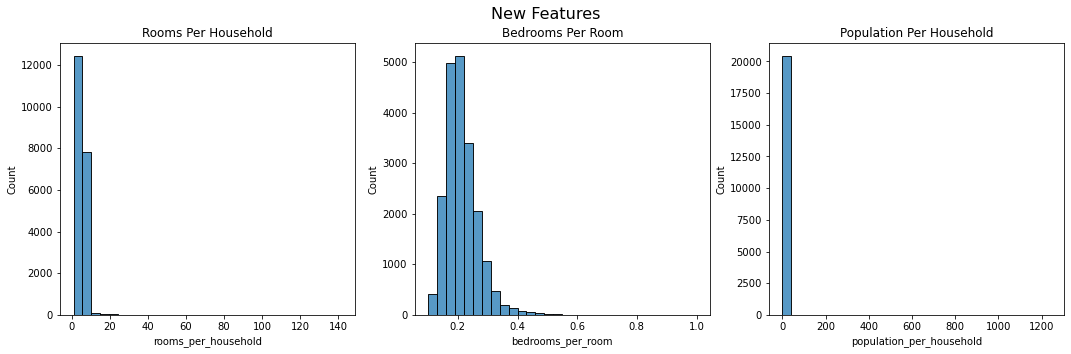

In [ ]:
# Distribution of the new features
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
sns.histplot(housing_data, x='rooms_per_household', bins=30, ax=axes[0])
sns.histplot(housing_data, x='bedrooms_per_room', bins=30, ax=axes[1])
sns.histplot(housing_data, x='population_per_household', bins=30, ax=axes[2])
axes[0].set_title('Rooms Per Household')
axes[1].set_title('Bedrooms Per Room')
axes[2].set_title('Population Per Household')
fig.suptitle('New Features', fontsize=16)

### Drop inconsistent and unreasonable rows that may mess with your model e.g population per household = 0,  which is not possible in the real world.

In [ ]:
#keep a copy of the original data before dropping some rows
dirty_data = housing_data.copy()

In [ ]:
# Filter out some unrealistic values
clean_data = housing_data.copy()
sensible_vals1 = (clean_data['population_per_household'] > 0) & (clean_data['population_per_household'] <= 15)
sensible_vals2 = (clean_data['rooms_per_household'] <= 50)
sensible_vals3 = clean_data['bedrooms_per_room'] <= 1
clean_data = clean_data[sensible_vals1 & sensible_vals2 & sensible_vals3]
print(f"Original rows: {len(housing_data)}")
print(f"cleaned rows: {len(clean_data)}")
print(f"outliers : {len(housing_data) - len(clean_data)} Outliers")

Original rows: 20433
cleaned rows: 20405
outliers : 28 Outliers


In [ ]:
# Quick check
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20412 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20412 non-null  float64
 1   latitude                  20412 non-null  float64
 2   housing_median_age        20412 non-null  float64
 3   total_rooms               20412 non-null  float64
 4   total_bedrooms            20412 non-null  float64
 5   population                20412 non-null  float64
 6   households                20412 non-null  float64
 7   median_income             20412 non-null  float64
 8   median_house_value        20412 non-null  float64
 9   ocean_proximity           20412 non-null  object 
 10  rooms_per_household       20412 non-null  float64
 11  bedrooms_per_room         20412 non-null  float64
 12  population_per_household  20412 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.2+ MB


Text(0.5, 0.98, 'New Cleaner Features')

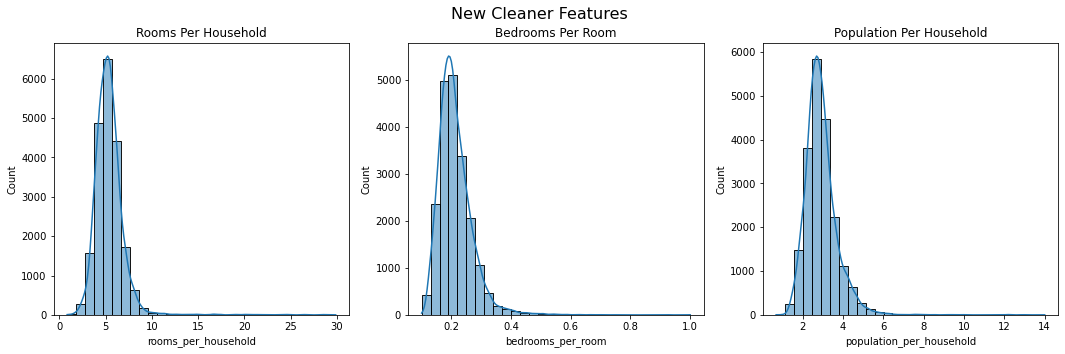

In [ ]:
# Check the new distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
sns.histplot(clean_data, x='rooms_per_household', bins=30, kde=True, ax=axes[0])
sns.histplot(clean_data, x='bedrooms_per_room', bins=30, kde=True, ax=axes[1])
sns.histplot(clean_data, x='population_per_household', bins=30, kde=True, ax=axes[2])
axes[0].set_title('Rooms Per Household')
axes[1].set_title('Bedrooms Per Room')
axes[2].set_title('Population Per Household')
fig.suptitle('New Cleaner Features', fontsize=16)

Text(0.5, 1.0, 'Correlation Analysis of the updated Numerical Columns')

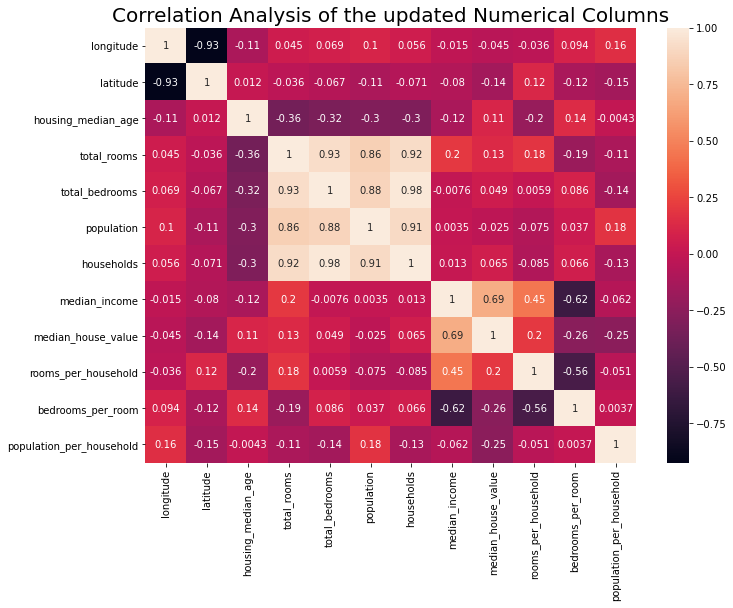

In [ ]:
# Correlation Analysis of Numerical Columns
numeric_corr = clean_data.corr()
plt.figure(figsize=(11,8))
sns.heatmap(numeric_corr, annot=True)
plt.title('Correlation Analysis of the updated Numerical Columns', fontsize=20)

### We created three new features which are population per household, bedrooms per room, & rooms per household to extract more insights from our data.

### From the correlation Analysis shown above, we can see that the median income and bedrooms per room are strongly negatively correlated, i.e A higher income relates to a lower bedrooms to room ratio which simply means that a person with higher income wil be able to afford a more luxury home than a person with lower income.

### N.B : A lower 'bedrooms per room' ratio indicates a luxury home with more rooms for entertainment e.g Cinema room, home gym etc while a higher ratiio indicates a smaller house with just bedrooms

## Feature Scaling & Encoding

### features to be Scaled:
        - latitude
        - longitude
        - housing median age
        - population
        - households
        - median income
        - median house value
        - rooms per household
        - bedrooms per room
        - population pe household
        
### Features to be encoded:
        - Ocean proximity
        -

### The Problem we are trying to solve in this project is the prediction of the house prices, the target variable is the "median_house_value". The target variable is a numerical column so the best model to be used is a regression model